In [ ]:
1.“通知人”都有谁？ 统计所有出现过的“通知人”，并计算他们各自发布的通知数量占总数的比例。
2.附件下载次数与通知人的关系？ 分析附件的下载次数与通知人是否存在某种联系。比如，是不是某些特定部门发布的通知，附件下载量总是特别高？
3.通知发布的高峰期？ 统计每天发布的通知数量，分析一下，通常在学期的哪个时间段，通知会变得特别密集？
4.自由探索！ 根据你对数据的好奇心，自行思考一个你感兴趣的问题，并进行数据分析。（例如：通知的标题长度和阅读量/下载量有关吗？标题中出现哪些关键词会更受关注？）
5.让图表说话！ 尝试使用 matplotlib 或其他可视化工具，将你在问题 3 和 4 中的分析结果以图表的形式呈现出来。

In [ ]:
1.

In [15]:
import pandas as pd

# datasource = pd.read_csv(
#     'AIsolution/work3/pandaswork/fzu.csv', header=0, encoding='utf-8')
datasource = pd.read_csv(
    'fzu.csv', header=0, encoding='utf-8')
datasource.dropna(axis=0,  thresh=1, inplace=True)
dic = {}
for index, row in datasource.iterrows():
    if row['通知人'] in dic:
        dic[row['通知人']] += 1
    else:
        dic[row['通知人']] = 1
# print(datasource.shape[0])
for key in dic.keys():
    dic[key] = dic[key]/datasource.shape[0]*100
    dic[key] = round(dic[key], 2)
    dic[key] = str(dic[key])+'%'
# print(dic)
ans = pd.DataFrame(dic, index=['百分比'])
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(ans)
# result = datasource['通知人'].value_counts()
# print(result)


      教学通知    质量办    教学运行     综合科     实践科    计划科    教研教改  教材中心   电教中心
百分比  1.48%  8.69%  40.26%  10.08%  22.69%  5.04%  10.93%  0.8%  0.02%


In [ ]:
这样我们便得出了各种类型的通知人以及他们发布的通知数量所占比例

In [ ]:
2.

In [ ]:
为了应对本次任务的分析下载次数，我在爬取数据的时候对多个附件的通知进行了取最大值的处理，防止多个附件的下载次数累积多于单个附件

In [2]:
import pandas as pd

datasource = pd.read_csv(
    'fzu.csv', header=0, encoding='utf-8')

datasource.dropna(axis=0, thresh=6, inplace=True)
dic = {}
for index, row in datasource.iterrows():
    if row['通知人'] not in dic:
        dic[row['通知人']] = [1, row['附件下载次数']]
    else:
        dic[row['通知人']][0] += 1
        dic[row['通知人']][1] += row['附件下载次数']

for key in dic.keys():
    dic[key][1] /= dic[key][0]
    dic[key][1] = round(dic[key][1], 0)
ans = pd.DataFrame(dic, index=['有附件的通知数', '平均附件下载次数'])
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
ans.sort_values(by='平均附件下载次数', axis=1, ascending=False, inplace=True)
print(ans)


             计划科     实践科    教研教改    教学运行     质量办   教材中心    综合科   教学通知
有附件的通知数     24.0   196.0    28.0   152.0    56.0   22.0   15.0   14.0
平均附件下载次数  2042.0  2029.0  1883.0  1242.0  1082.0  945.0  904.0  761.0


In [ ]:
由此可见，计划科虽然发布了很少的附件，但是平均下载量领先，并且实践科附件数以及下载次数均很多。

In [ ]:
3.

In [ ]:
首先我不是福建本地人，所以我并不清楚这边的学校时间表，所以我只能浅略估计，我规定（3 9）月份为开学初，
（5 6 10 11 12）月份为学期中，（1 7）月份为学期末，（2 8）月份为假期，并由此进行分析。

In [6]:
import pandas as pd
import re

datasource = pd.read_csv(
    'fzu.csv', header=0, encoding='utf-8')
datesoc = datasource['日期']
datesoc = datesoc.value_counts()
# print(datesoc)
# 9 10 11 12 1
# 3 4 5 6 7
# 9 3 开学初
# 10 11 5 6 学期中
# 12 1 7 学期末
# 2 8假期
dic1 = {'09': 0, '03': 0}  # 开学初
dic2 = {'10': 0, '11': 0, '05': 0, '06': 0}  # 学期中
dic3 = {'12': 0, '01': 0, '07': 0}  # 学期末
dic4 = {'02': 0, '08': 0}  # 假期
for index, value in datesoc.items():
    index = str(index)
    month = re.search(f'-(.*?)-', index)
    if month:
        month = month.group(1)
        if month in dic1:
            dic1[month] += value
        elif month in dic2:
            dic2[month] += value
        elif month in dic3:
            dic3[month] += value
        elif month in dic4:
            dic4[month] += value
a1 = 0  # 开学初
a2 = 0  # 学期中
a3 = 0  # 学期末
a4 = 0  # 假期
for key in dic1.keys():
    a1 += dic1[key]
for key in dic2.keys():
    a2 += dic2[key]
for key in dic3.keys():
    a3 += dic3[key]
for key in dic4.keys():
    a4 += dic4[key]
print(f'开学初：{a1}，学期中：{a2}，学期末：{a3}，假期：{a4}')
print(f'开学初：{a1/2}，学期中：{a2/4}，学期末：{a3/3}，假期：{a4/2}')

开学初：917，学期中：1538，学期末：853，假期：361
开学初：458.5，学期中：384.5，学期末：284.3333333333333，假期：180.5


In [ ]:
由数据分析可得，在学期中通知最多，假期时的通知最少，但是如果取平均值，那么可以发现开学时的通知发布频率最大，假期时候仍然是最少的

In [ ]:
4.

In [ ]:
让我们来搞点有意思的东西，简单统计一下有多少条通知以“关于”开头，并计算所占比例。

In [7]:
import pandas as pd
import re

datasource = pd.read_csv(
    'fzu.csv', header=0, encoding='utf-8')

name = datasource['标题']
ans = 0
for index, value in name.items():
    if re.match('关于', value):
        ans += 1
print(ans)
print(round(ans/name.shape[0]*100, 2))


3470
84.47


In [ ]:
可见以“关于”开头的消息数量占了84.47%，总结出fzu的教务处通告还是太公式化了（

In [ ]:
5.

In [ ]:
使任务3可视化。

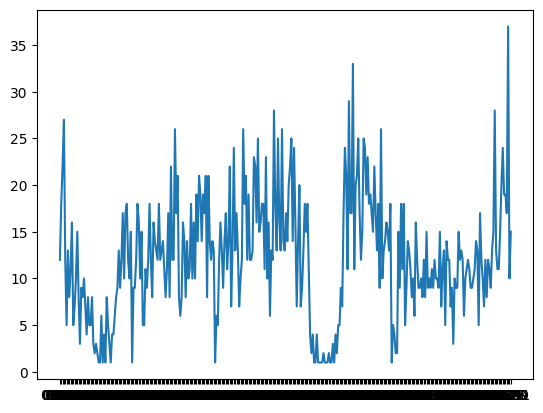

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

datasource = pd.read_csv(
    'fzu.csv', header=0, encoding='utf-8')
datasource['日期'] = datasource['日期'].str[6:11]
datesoc = datasource['日期']
# print(datesoc)
datesoc = datesoc.value_counts()
datesoc.sort_index(inplace=True)
# print(datesoc)
x = np.array(datesoc.index)
y = np.array(datesoc)
plt.plot(x, y)
plt.show()

In [ ]:
此视图是通过将日期从1月到12月进行排序，但我并没有按照月份汇总，所以数据量实在太多了，导致看起来没有那么直观。并且这个记事本的视图展出貌似无法使用库里的编辑器。